#**Author: SANJEEV KUMAR**


##**The Sparks Foundation: Data Science and Business Analytics (GRIP June '21)**




##**Task 6: Classification prediction using Decision Tree classifier Problem Statement**




**Predict class of flower for flowers from 'Iris' dataset.**

In [3]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the iris dataset
irisDf = sns.load_dataset('iris')
irisDf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
y=irisDf['species'].value_counts()
print(y)

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


No class imbalance

In [6]:

irisDf.shape

(150, 5)

In [7]:

irisDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



There is no missing data

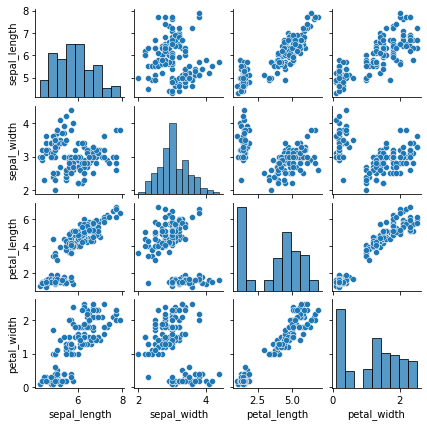

In [8]:
#Checking for correlation between different variables
sns.pairplot(irisDf,height=1.5);

###**Model creation using Decision Tree Algorithm**

In [9]:
# Putting feature variable to X
X = irisDf.drop('species',axis=1)

# Putting response variable to y
y = irisDf['species']

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [14]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [16]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

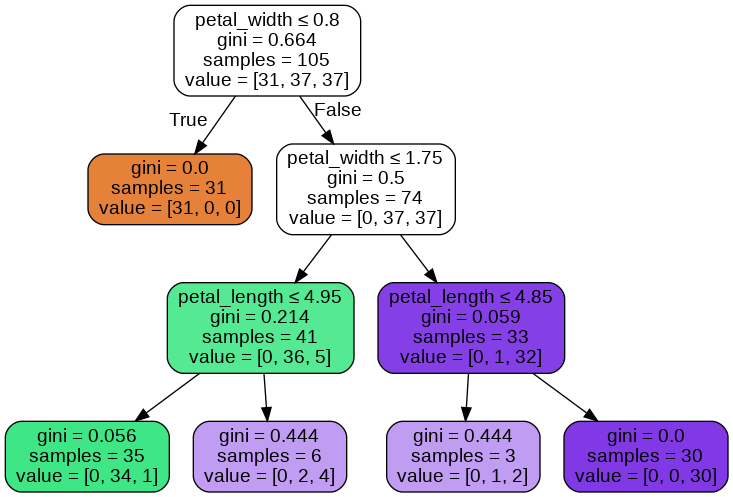

In [17]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Train accuracy")
print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("\n")
print("Test accuracy")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Train accuracy
0.9619047619047619
[[31  0  0]
 [ 0 34  3]
 [ 0  1 36]]


Test accuracy
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


This appears to be doing a very good job on the accuracy. Hence can be used to predict different classes


#**Conclusion -**

**1) I have successfully implemented the decision tree algorithm on given IRIS dataset.**

.
**2)Now, If we feed any new data to this classifier, it would be able to predict the right class accordingly.**